# **EDA**

In [1]:
# LIBRARIES: 

import os
import re
import pandas as pd
import dotenv
import matplotlib.pyplot as plt

In [2]:
# CONFIGURATIONS: 


dotenv.load_dotenv()
santi_project_path = os.getenv("santi_project_path")

dataset_images_path = "/1_DataSet/1_DataSet/"

In [3]:

# FUNCTIONS:

def plot_images_per_folder(path):
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    counts = [len(os.listdir(os.path.join(path, folder))) for folder in folders]

    plt.figure(figsize=(10, 6))
    plt.bar(folders, counts, color='skyblue')
    plt.xlabel('Folders')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Folder')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def extract_image_info(base_path):
    data = []
    for folder in os.listdir(base_path):
        if folder.startswith("toma_"):
            folder_path = os.path.join(base_path, folder)
            for img_name in os.listdir(folder_path):
                if img_name.endswith('.jpg') or img_name.endswith('.png'):
                    # Quitar extensión
                    name_wo_ext = os.path.splitext(img_name)[0]
                    # Separar por guion bajo
                    parts = name_wo_ext.split('_')
                    #print(parts)
                    # Si el nombre tiene al menos 5 partes (ejemplo: fecha, hora, radianes, direccion)
                    if len(parts) >= 5:
                        fecha = parts[0] 
                        hora = parts[1]
                        radianes = float(parts[3]) 
                        direccion = parts[-1]
                        data.append({
                            "carpeta": folder,
                            "archivo": img_name,
                            "fecha": fecha,
                            "hora": hora,
                            "radianes": radianes,
                            "direccion": direccion
                        })
    return pd.DataFrame(data)


def  plot_bar(df, columna):
    df[columna].value_counts().plot.bar(color='skyblue')
    plt.xlabel('Dirección')
    plt.ylabel('Cantidad de imágenes')
    plt.title(f'Cantidad de imágenes por {columna}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    


# LOGIC: 


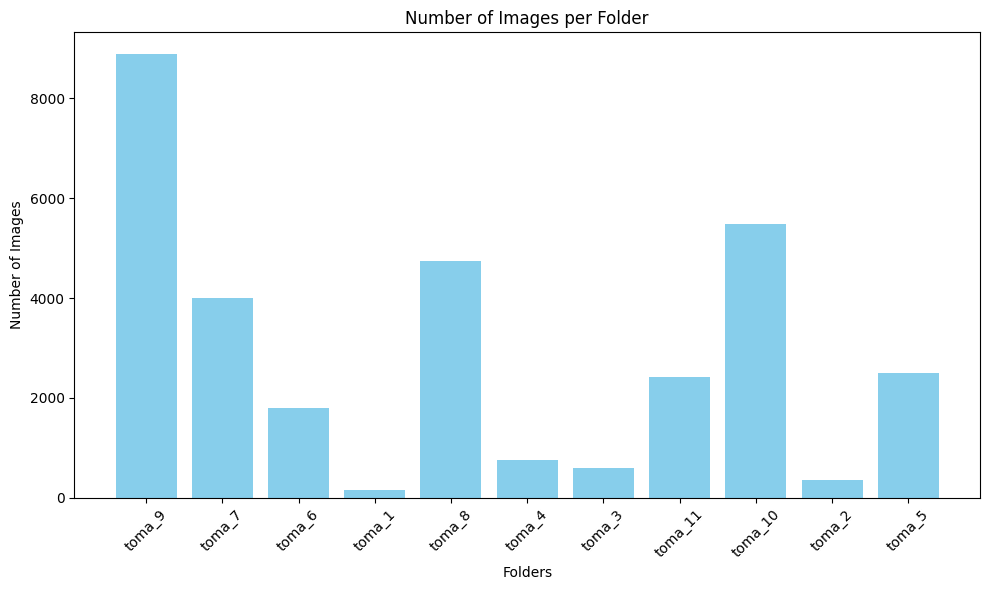

In [4]:
## Image Per Folder
plot_images_per_folder(santi_project_path+dataset_images_path)

In [5]:
## Extraer información de las imagenes creadas 
df_imagenes = extract_image_info(santi_project_path + dataset_images_path)
df_imagenes


,carpeta,archivo,fecha,hora,radianes,direccion
0,toma_9,2025-06-16_22-27-59__0.004000000000000014_righ...,2025-06-16,22-27-59,0.004,right
1,toma_9,2025-06-16_22-34-44__-0.00599999999999997_left...,2025-06-16,22-34-44,-0.006,left
2,toma_9,2025-06-16_22-24-21__-0.003999999999999988_lef...,2025-06-16,22-24-21,-0.004,left
3,toma_9,2025-06-16_22-46-36__0.050000000000000044_righ...,2025-06-16,22-46-36,0.050,right
4,toma_9,2025-06-16_22-32-43__0.01400000000000002_right...,2025-06-16,22-32-43,0.014,right
...,...,...,...,...,...,...
31706,toma_5,2025-06-16_16-34-06__-0.002000000000000016_lef...,2025-06-16,16-34-06,-0.002,left
31707,toma_5,2025-06-16_16-33-59__0.007999999999999988_righ...,2025-06-16,16-33-59,0.008,right
31708,toma_5,2025-06-16_16-35-13__-0.06600000000000004_left...,2025-06-16,16-35-13,-0.066,left
31709,toma_5,2025-06-16_16-34-10__0.0059999999999999845_rig...,2025-06-16,16-34-10,0.006,right


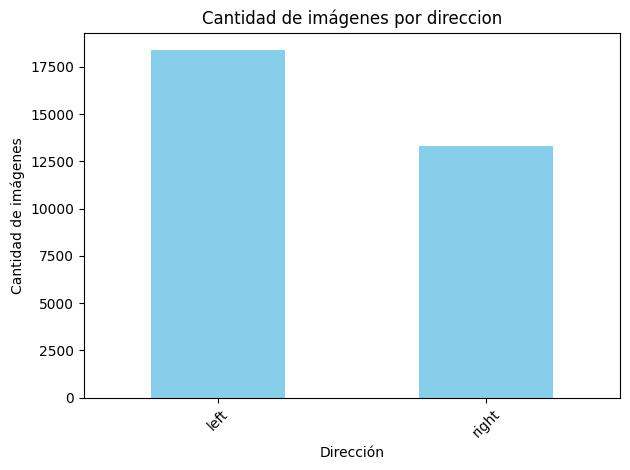

In [6]:
## Graficar por direccion
plot_bar(df_imagenes, 'direccion')

In [7]:
# Posible sesgo, ya que hay mas imagenes para la izquierda que la derecha,

# **DATA PROCESSING**

In [8]:
# LIBRARIES:

import cv2
import numpy as np
import matplotlib.pyplot as plt


# CONFIGURATIONS:


df_image_metadata = df_imagenes.copy()



# FUNCTIONS: 

def cargar_y_preprocesar_img_TEST(ruta_img):

    img = cv2.imread(ruta_img)
    img = cv2.resize(img, (200, 66))
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img_yuv




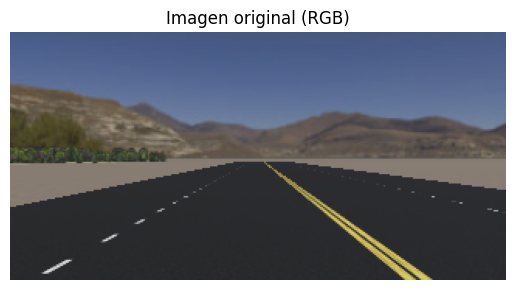

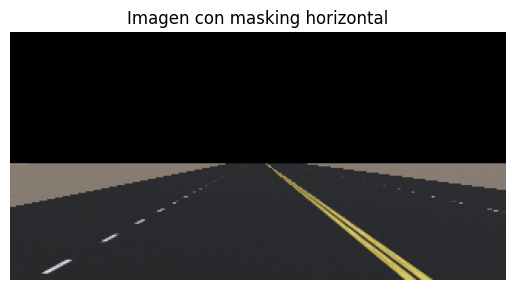

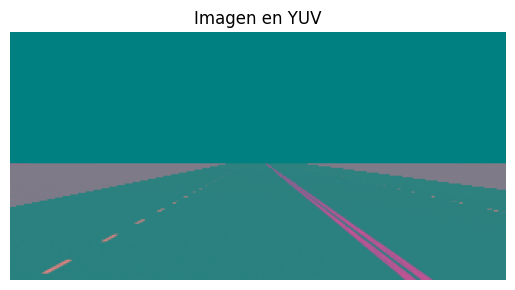

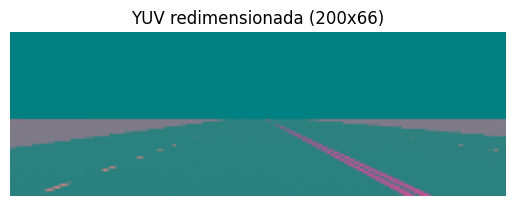

In [9]:
# LOGIC:  IDEA

ruta_img = '/Users/santireycha/Documents/ML_PROJECTS/AUTONOMOUIS_CAR/1_DataSet/1_DataSet/toma_7/2025-06-16_21-43-50__0_right.png'

# 1. Cargar imagen original (BGR)
img_bgr = cv2.imread(ruta_img)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Imagen original (RGB)')
plt.axis('off')
plt.show()


# 2. Crear el crop de la imagen original
img_masked=img_bgr.copy()
img_masked[:85, :, :] = 0  # filas 0 a 39 en negro
img_rgb = cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Imagen con masking horizontal')
plt.axis('off')
plt.show()


# 3. Convertir a YUV y visualizar
img_yuv = cv2.cvtColor(img_masked, cv2.COLOR_BGR2YUV)
plt.imshow(img_yuv)
plt.title('Imagen en YUV')
plt.axis('off')
plt.show()


# 4. Redimensionar a 200x66 y visualizar (en YUV)
img_yuv_resized = cv2.resize(img_yuv, (200, 66))
plt.imshow(img_yuv_resized)
plt.title('YUV redimensionada (200x66)')
plt.axis('off')
plt.show()

In [19]:
# FUNCTIONS: CLASS

class ImagePreprocessor:
    def __init__(self, crop_top=85, resize_shape=(200, 66)):
        self.crop_top = crop_top
        self.resize_shape = resize_shape

    def load(self, path):
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"No se pudo cargar la imagen: {path}")
        return img

    def mask_top(self, img):
        img_masked = img.copy()
        img_masked[:self.crop_top, :, :] = 0
        return img_masked

    def to_yuv(self, img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    def resize(self, img):
        return cv2.resize(img, self.resize_shape)

    def process(self, path):
        img = self.load(path)
        img_masked = self.mask_top(img)
        img_yuv = self.to_yuv(img_masked)
        img_yuv_resized = self.resize(img_yuv)
        return img_yuv_resized
    

def mostrar_imagen(imagenes, idx):
    """
    Muestra la imagen en la posición idx de la lista imagenes.
    """
    if idx < 0 or idx >= len(imagenes):
        print("Índice fuera de rango.")
        return
    plt.imshow(imagenes[idx])
    plt.title(f'Imagen en posición {idx}')
    plt.axis('off')
    plt.show()

In [11]:
pre = ImagePreprocessor()
imagenes = []
metadatos = []

for idx, row in df_imagenes.iterrows():
    path = os.path.join(santi_project_path + dataset_images_path, row['carpeta'], row['archivo'])
    try:
        img_array = pre.process(path)
        imagenes.append(img_array)
        metadatos.append({
            "indice": idx,
            "path_image": path,
            "direccion": row["direccion"],
            "radianes": row["radianes"]
        })
    except Exception as e:
        print(f"Error procesando {path}: {e}")


In [14]:
df_dataset_metadatos = pd.DataFrame(metadatos)


In [15]:
df_dataset_metadatos

,indice,path_image,direccion,radianes
0,0,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.004
1,1,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.006
2,2,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.004
3,3,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.050
4,4,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.014
...,...,...,...,...
31706,31706,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.002
31707,31707,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.008
31708,31708,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.066
31709,31709,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.006


In [18]:
len(imagenes)

31711

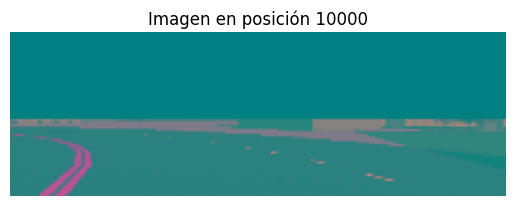

In [22]:
mostrar_imagen(imagenes, 10000)

In [23]:
df_dataset_metadatos.to_csv("df_dataset_metadatos.csv", index=False)

In [24]:
np.save("imagenes.npy", np.array(imagenes))

In [ ]:
# pickle test
import pickle

with open("df_dataset_metadatos.pkl", "wb") as f:
    pickle.dump(df_dataset_metadatos, f)
with open("imagenes.pkl", "wb") as f:
    pickle.dump(imagenes, f)